# Regression Model Analysis on Computer Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Pallavi K R/Desktop/Pal/New folder/Computer_Data.csv")
df.shape

(6259, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 464.6+ KB


In [ ]:
### print(df.head())-> top 5 rows
### df.isnull()     -> to check the missing values
### df.columns      -> to get the columns name

In [4]:
## dropping one column (Serial number- first column - Unnamed)
df=df.drop('Unnamed: 0', axis=1)
df.shape

(6259, 10)

In [5]:
## Checking the correlation between the features

df.corr()

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


In [6]:
## summary for continuous variables

df.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [7]:
## summary for categeorical variables

df.describe(include=['object'])

,cd,multi,premium
count,6259,6259,6259
unique,2,2,2
top,no,no,yes
freq,3351,5386,5647


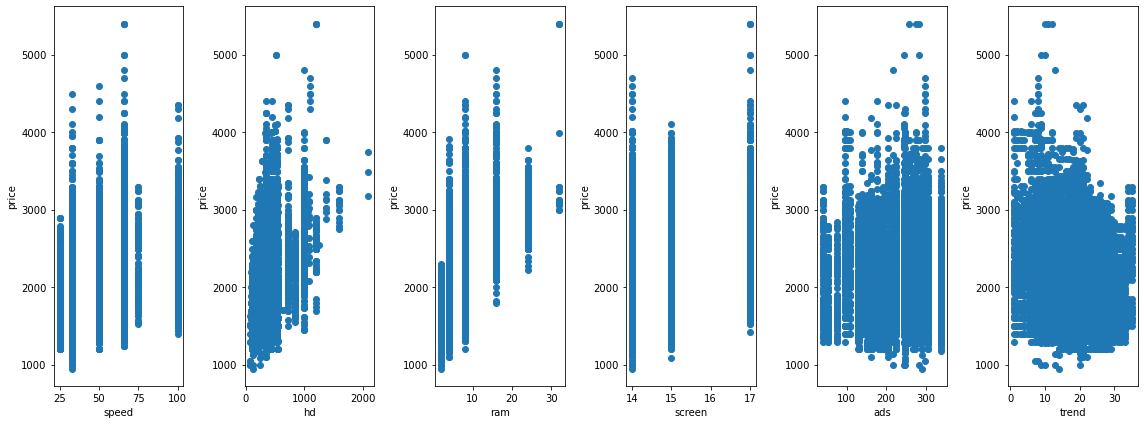

In [8]:
## to know the contribution of each feature

fig,axes = plt.subplots(nrows=1,ncols=6,figsize=(16,6))

axes[0].plot(df['speed'],df['price'],'o')
axes[0].set_ylabel("price")
axes[0].set_xlabel("speed")

axes[1].plot(df['hd'],df['price'],'o')
axes[1].set_ylabel("price")
axes[1].set_xlabel("hd")

axes[2].plot(df['ram'],df['price'],'o')
axes[2].set_ylabel("price")
axes[2].set_xlabel("ram")

axes[3].plot(df['screen'],df['price'],'o')
axes[3].set_ylabel("price")
axes[3].set_xlabel("screen")

axes[4].plot(df['ads'],df['price'],'o')
axes[4].set_ylabel("price")
axes[4].set_xlabel("ads")

axes[5].plot(df['trend'],df['price'],'o')
axes[5].set_ylabel("price")
axes[5].set_xlabel("trend")
plt.tight_layout()

#### Fitting Label Encoder (Categeorical to Continuous)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
for i in range(0, df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])

In [11]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1


In [ ]:
## Alternatively: 
## x = df[['speed','hd','ram','ads','cd','multi','premium','screen','trend']] 

In [12]:
x =df.drop('price', axis=1)
y = df['price']

##### Splitting Data

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [14]:
len(df)

6259

In [15]:
x_train.shape

(4381, 9)

In [16]:
y_train.shape

(4381,)

In [17]:
x_test.shape

(1878, 9)

# Fitting Liniar Regression Model on training dataset

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
model.intercept_

317.79225764612033

In [21]:
model.coef_

array([   9.36217403,    0.77048551,   49.56173842,  121.65661358,
         48.00986297,  113.45976662, -504.70785319,    0.65439612,
        -51.64753609])

In [22]:
model.score(x_train,y_train)

0.7796944569461286

#### Predictions on test set

In [23]:
test_predictions=model.predict(x_test)
test_predictions

array([2475.56805809, 2065.30087974, 2181.68387434, ..., 1542.53744365,
       2273.13041389, 2580.72574544])

In [24]:
test_residuals = y_test - test_predictions
test_residuals

508     214.431942
4527   -166.300880
4132    -52.683874
2326    315.167191
3936    239.244963
           ...    
5591    -65.471122
5664   -386.750560
5772    156.462556
3767    484.869586
754    -115.725745
Name: price, Length: 1878, dtype: float64

In [25]:
len(test_residuals)

1878

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [27]:
MAE = mean_absolute_error(y_test,test_predictions)
MAE

203.3207306455312

In [28]:
MSE = mean_squared_error(y_test,test_predictions)
MSE

75883.59122167618

In [29]:
RMSE=np.sqrt(MSE)
RMSE

275.46976462340865

In [30]:
r2_score(y_test,test_predictions)

0.7648783430311872

# Diagnosis of Model

#### 1.To check the linearity

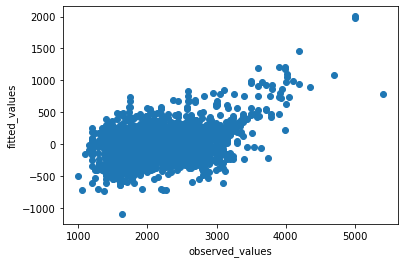

In [31]:
plt.scatter(y_test,test_residuals)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

#### 2.To check the normality

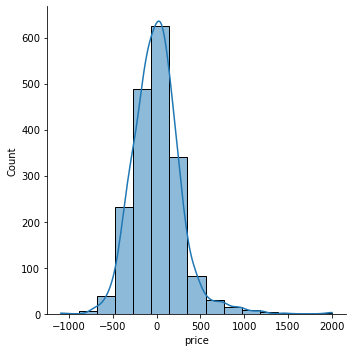

In [32]:
sns.displot(test_residuals,bins=15,kde=True)

#### To check equal variance between error
#### 3.Homoscadesicity (Residuals Vs Fitted Values)

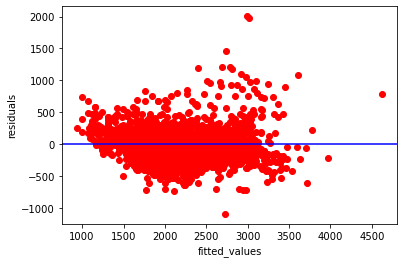

In [33]:
plt.scatter(test_predictions,test_residuals,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

# Retraining Model on Full Data

In [34]:
final_model = LinearRegression()
final_model.fit(x,y)

LinearRegression()

In [35]:
final_model.coef_

array([   9.32028083,    0.78177979,   48.2559591 ,  123.08904227,
         60.91670833,  104.32381921, -509.22473189,    0.65729133,
        -51.84958117])

In [36]:
coeff_df = pd.DataFrame(final_model.coef_,x.columns,columns=['coefficient'])
coeff_df

,coefficient
speed,9.320281
hd,0.781780
ram,48.255959
screen,123.089042
cd,60.916708
multi,104.323819
premium,-509.224732
ads,0.657291
trend,-51.849581


In [37]:
y_hat = final_model.predict(x)

In [38]:
## Sample values taken from the dataset to cross verify
campaign=[[33,340,16,14,0,0,1,94,1]]

In [ ]:
3295	33	340	16	14	0	0	1	94	1

In [39]:
final_model.predict(campaign)

array([2877.41539115])

# Deployment

## Model Persistance (Saving and Loading a Model)

In [40]:
from joblib import dump

In [41]:
dump(final_model,'Computers_price.joblib')

['Computers_price.joblib']

In [42]:
from joblib import load

In [43]:
loaded_model = load('Computers_price.joblib')

In [44]:
loaded_model.intercept_

307.98798482149687

In [45]:
loaded_model.coef_

array([   9.32028083,    0.78177979,   48.2559591 ,  123.08904227,
         60.91670833,  104.32381921, -509.22473189,    0.65729133,
        -51.84958117])

In [ ]:
loaded_model.predict(campaign) ## campaign is the input

#### Data Insight: 

##### Since the error is more and accuracy is less we will be deploying the other regression techniques

# Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
Polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [48]:
# Converter fits to data in this case, reads in every x column
Polynomial_converter.fit(x)

PolynomialFeatures(include_bias=False)

In [49]:
# Then it "transforms" and outputs the new polynomial data
Polynomial_converter.transform(x)

array([[2.500e+01, 8.000e+01, 4.000e+00, ..., 8.836e+03, 9.400e+01,
        1.000e+00],
       [3.300e+01, 8.500e+01, 2.000e+00, ..., 8.836e+03, 9.400e+01,
        1.000e+00],
       [2.500e+01, 1.700e+02, 4.000e+00, ..., 8.836e+03, 9.400e+01,
        1.000e+00],
       ...,
       [1.000e+02, 1.200e+03, 2.400e+01, ..., 1.521e+03, 1.365e+03,
        1.225e+03],
       [1.000e+02, 8.500e+02, 1.600e+01, ..., 1.521e+03, 1.365e+03,
        1.225e+03],
       [1.000e+02, 8.500e+02, 1.600e+01, ..., 1.521e+03, 1.365e+03,
        1.225e+03]])

In [50]:
poly_features = Polynomial_converter.fit_transform(x)

In [51]:
poly_features.shape

(6259, 54)

In [52]:
x.shape

(6259, 9)

In [53]:
x.iloc[0]

speed      25
hd         80
ram         4
screen     14
cd          0
multi       0
premium     1
ads        94
trend       1
Name: 0, dtype: int64

In [54]:
poly_features[0]

array([2.500e+01, 8.000e+01, 4.000e+00, 1.400e+01, 0.000e+00, 0.000e+00,
       1.000e+00, 9.400e+01, 1.000e+00, 6.250e+02, 2.000e+03, 1.000e+02,
       3.500e+02, 0.000e+00, 0.000e+00, 2.500e+01, 2.350e+03, 2.500e+01,
       6.400e+03, 3.200e+02, 1.120e+03, 0.000e+00, 0.000e+00, 8.000e+01,
       7.520e+03, 8.000e+01, 1.600e+01, 5.600e+01, 0.000e+00, 0.000e+00,
       4.000e+00, 3.760e+02, 4.000e+00, 1.960e+02, 0.000e+00, 0.000e+00,
       1.400e+01, 1.316e+03, 1.400e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 9.400e+01, 1.000e+00, 8.836e+03, 9.400e+01, 1.000e+00])

In [55]:
poly_features[0][:6]

array([25., 80.,  4., 14.,  0.,  0.])

In [56]:
poly_features[0][:6]**2

array([ 625., 6400.,   16.,  196.,    0.,    0.])

#### Train Test Split 

In [57]:
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [58]:
## LR Model
model = LinearRegression()

In [59]:
## Fitting
model.fit(x_train,y_train)

LinearRegression()

In [60]:
## Evaluation of LR model
test_predictions=model.predict(x_test)

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [62]:
MAE = mean_absolute_error(y_test,test_predictions)
MAE

158.20906385237095

In [63]:
MSE = mean_squared_error(y_test,test_predictions)
MSE

45622.177569258056

In [64]:
RMSE=np.sqrt(MSE)
RMSE

213.59348672011996

In [65]:
r2_score(y_test,test_predictions)

0.8586418774874053

 ## For Different Degree Values

In [66]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    # create poly data set for degree 'd'
    Polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = Polynomial_converter.fit_transform(x)
    
    #Split this new Polydata set
    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #train on this new Poly data set
    model = LinearRegression(fit_intercept=True)
    model.fit(x_train,y_train)
    
    # Predict on both test and train set
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    # Calculate Errors
    
    # Errors on train set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on test set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    
    # Append errors to lists for plotting later
    
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

MemoryError: Unable to allocate 167. MiB for an array with shape (4381, 5004) and data type float64

In [67]:
train_rmse_errors

[275.09199219847574,
 209.5095846440061,
 185.83806022615937,
 168.35143038792904,
 205.12889871226255]

In [68]:
test_rmse_errors

[275.46976462340865,
 213.59348672012078,
 200.58556006907264,
 344.959749541321,
 6314.687576165892]

##### For degree 3 test_rmse - train_rmse = 200.58 - 185.83 = 14.75
##### For degree 2 test_rmse - train_rmse = 213.58 - 209.50 = 4.08 
##### So degree of 2 is the better value

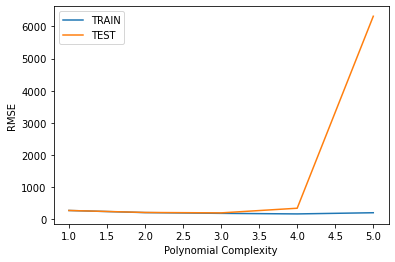

In [69]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [84]:
## train_rmse_errors = np.array([train_rmse_errors])
## test_rmse_errors = np.array([test_rmse_errors])

## Choosing Final Model

In [87]:
final_poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [85]:
final_model = LinearRegression()

In [88]:
final_model.fit(final_poly_converter.fit_transform(x),y)

LinearRegression()

In [89]:
## Saving and loading final model

from joblib import dump, load

In [90]:
dump(final_model, 'Computers_price_poly.joblib')

['Computers_price_poly.joblib']

In [91]:
dump(final_poly_converter,'Poly_converter.joblib')

['Poly_converter.joblib']

# Deployment

In [92]:
loaded_poly = load('Poly_converter.joblib')
loaded_model = load('Computers_price_poly.joblib')

In [93]:
campaign=[[33,340,16,14,0,0,1,94,1]]

In [94]:
campaign_poly = loaded_poly.transform(campaign)

In [95]:
final_model.predict(campaign_poly)

array([2896.79388662])